# Loan Status prediction for Bank.

#### I am conducting this exercise as part of the competition organized by the online platform called "analyticsvidhya.com" 

In [1]:
#Importing the Libraries that we will be using
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.feature_extraction import DictVectorizer 
plt.style.use(style='seaborn')
%matplotlib inline

C:\Miniconda3\envs\py36_work\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading the train file in to the memory as Pandas Dataframe
Loan_train = pd.read_csv("./data/Loan Data/train.csv")

In [3]:
# Now we print the first 5 raws 
Loan_train.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Now we see some description about our data
Loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
Loan_train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001653,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
Loan_train.corr("pearson")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [7]:
Loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
Loan_train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

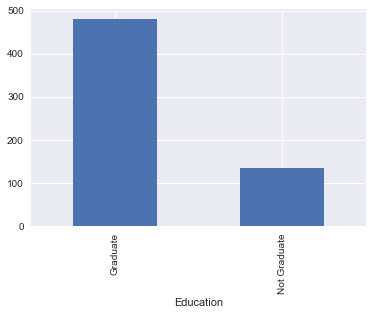

In [9]:
# First we see the fetures that don't have any missing value.
Loan_train.Education.groupby(Loan_train["Education"]).count().plot(kind='bar')

In [10]:
Loan_train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

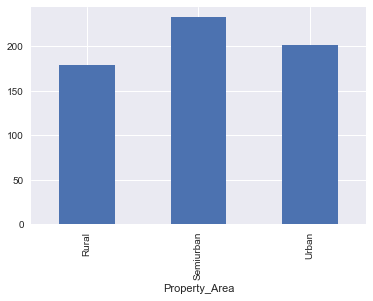

In [11]:
Loan_train.Property_Area.groupby(Loan_train["Property_Area"]).count().plot(kind='bar')

In [12]:
# Now we handle the missing values in othe categorical fetures.
Loan_train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
# Total Male applicant count in the Dataset
male_count = Loan_train.Gender.loc[Loan_train.Gender == 'Male'].count()
print(male_count)

489


In [14]:
#Total Female applicant count in the Dataset
female_count = Loan_train.Gender.loc[Loan_train["Gender"] == 'Female'].count()
print(female_count)

112


In [15]:
# Mean value of Male income count
m_income_mean = Loan_train.ApplicantIncome.loc[Loan_train["Gender"] == 'Male'].mean()
print(int(m_income_mean))

5446


In [16]:
# Mean value of Female count
f_income_mean = Loan_train.ApplicantIncome.loc[Loan_train["Gender"] == 'Female'].mean()
print(int(f_income_mean))

4643


In [17]:
# Line of code where Gender values are nan for ApplicantIncome, Married, Coapplicantincome and Dependent attributes
Loan_train[["ApplicantIncome", "Married", "CoapplicantIncome", "Dependents"]].loc[Loan_train["Gender"].isnull()]

,ApplicantIncome,Married,CoapplicantIncome,Dependents
23,3365,Yes,1917.0,2
126,23803,Yes,0.0,3+
171,51763,Yes,0.0,3+
188,674,Yes,5296.0,0
314,2473,Yes,1843.0,0
334,9833,Yes,1833.0,1
460,2083,Yes,4083.0,0
467,16692,Yes,0.0,0
477,2873,Yes,1872.0,2
507,3583,No,0.0,0


In [18]:
boolean_m = []
for gender,income in zip(Loan_train.Gender,Loan_train.ApplicantIncome):
        if gender == " " and income >= m_income_mean:
            boolean_m.append(True)
        else:
            boolean_m.append(False)

In [19]:
boolean_f = []
for gender,income in zip(Loan_train.Gender,Loan_train.ApplicantIncome):
    if gender == " " and income < m_income_mean:
        boolean_f.append(True)
    else:
        boolean_f.append(False)

In [20]:
male = pd.Series(boolean_m)
female = pd.Series(boolean_f)

In [21]:
male.unique()

array([False], dtype=bool)

In [22]:
Loan_train.Gender[male] == "Male"
Loan_train.Gender[female] == "Female"

Series([], Name: Gender, dtype: bool)

In [23]:
Loan_train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [24]:
Loan_train.loc[Loan_train["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [25]:
Loan_train["Gender"][(Loan_train.Gender.isnull()) & (Loan_train.ApplicantIncome >= m_income_mean)] = "Male"
Loan_train["Gender"][(Loan_train.Gender.isnull()) & (Loan_train.ApplicantIncome < m_income_mean)] = "Female"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
Loan_train.Gender.unique()

array(['Male', 'Female'], dtype=object)

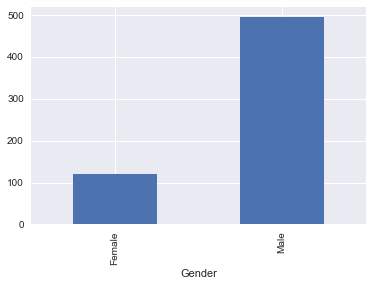

In [27]:
Loan_train.Gender.groupby(Loan_train["Gender"]).count().plot(kind = "bar")

In [28]:
Loan_train.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [29]:
Loan_train.loc[Loan_train["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [30]:
Loan_train["Married"][(Loan_train["Married"].isnull()) & (Loan_train.ApplicantIncome >= m_income_mean)] = "No"
Loan_train["Married"][(Loan_train["Married"].isnull()) & (Loan_train.ApplicantIncome < m_income_mean)] = "Yes"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


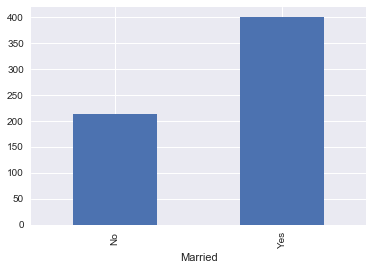

In [31]:
Loan_train.Married.groupby(Loan_train["Married"]).count().plot(kind = "bar")

In [32]:
Loan_train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [33]:
#Loan_train.replace({"Dependents" : {"3+" : "3"}}, inplace = True)
Loan_train["Dependents"][Loan_train["Dependents"] == "3+"] = "3"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


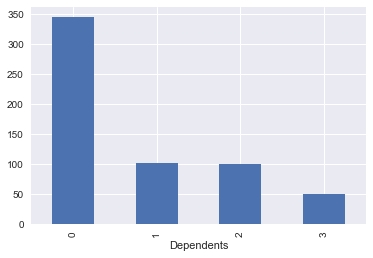

In [34]:
Loan_train["Loan_Status"].groupby(Loan_train["Dependents"]).count().plot(kind="bar")

In [35]:
Loan_train.Dependents.fillna("0",inplace=True)

In [36]:
Loan_train["Dependents"] = Loan_train["Dependents"].astype(int)

In [37]:
Loan_train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [38]:
Loan_train["Self_Employed"][Loan_train["Self_Employed"] == "Yes"].count()

82

In [39]:
Loan_train["Self_Employed"][Loan_train["Self_Employed"] == "No"].count()

500

In [40]:
Loan_train.loc[Loan_train["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [41]:
Loan_train["Self_Employed"][(Loan_train["Self_Employed"].isnull()) & (Loan_train.Education == "Graduate")] = "No"
Loan_train["Self_Employed"][(Loan_train["Self_Employed"].isnull()) & (Loan_train.Education == "Not Graduate")] = "Yes"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


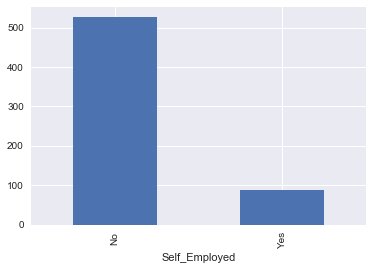

In [42]:
Loan_train.Self_Employed.groupby(Loan_train["Self_Employed"]).count().plot(kind = "bar")

In [43]:
Loan_train.Credit_History.unique()

array([  1.,   0.,  nan])

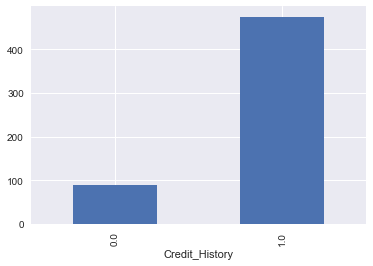

In [44]:
Loan_train.Loan_Status.groupby(Loan_train["Credit_History"]).count().plot(kind="bar")

In [45]:
Loan_train.Credit_History.loc[Loan_train["Credit_History"] == 1.0].count()

475

In [46]:
Loan_train.Credit_History.loc[Loan_train["Credit_History"] == 0.0].count()

89

In [47]:
Loan_train["Credit_History"] = Loan_train["Credit_History"].fillna("1")

In [48]:
Loan_train["Credit_History"] = Loan_train["Credit_History"].astype(int)

In [49]:
Loan_train.Credit_History.unique()

array([1, 0], dtype=int64)

In [50]:
Loan_train[["LoanAmount", "Gender"]].groupby(Loan_train["Gender"]).mean()

,LoanAmount
Gender,
Female,127.068376
Male,151.176842


In [51]:
Loan_train["LoanAmount"][(Loan_train["LoanAmount"].isnull()) & (Loan_train["Gender"] == "Female")] = 127
Loan_train["LoanAmount"][(Loan_train["LoanAmount"].isnull()) & (Loan_train["Gender"] == "Male")] = 151

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
Loan_train["Income_Basket"] = pd.cut(Loan_train["ApplicantIncome"], 7) 

In [53]:
Loan_train[["Income_Basket", "ApplicantIncome"]].groupby(["Income_Basket"]).agg({"mean"})

,ApplicantIncome
,mean
Income_Basket,
"(69.15, 11700.0]",4243.165505
"(11700.0, 23250.0]",15985.406250
"(23250.0, 34800.0]",28824.500000
"(34800.0, 46350.0]",38955.000000
"(46350.0, 57900.0]",51763.000000
"(57900.0, 69450.0]",63337.000000
"(69450.0, 81000.0]",81000.000000


In [54]:
Loan_train["ApplicantIncome"][Loan_train["ApplicantIncome"] <= 11700] = 0
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 11700) & (Loan_train["ApplicantIncome"] <= 23250)] = 1
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 23250) & (Loan_train["ApplicantIncome"] <= 34800)] = 2
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 34800) & (Loan_train["ApplicantIncome"] <= 46350)] = 3
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 46350) & (Loan_train["ApplicantIncome"] <= 57900)] = 4
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 57900) & (Loan_train["ApplicantIncome"] <= 69450)] = 5
Loan_train["ApplicantIncome"][(Loan_train["ApplicantIncome"] > 69450) & (Loan_train["ApplicantIncome"] <= 81000)] = 6

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

In [55]:
Loan_train.ApplicantIncome.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [56]:
Loan_train["Income_Basket(Coapplicant)"] = pd.cut(Loan_train["CoapplicantIncome"], 3) 

In [57]:
Loan_train[["Income_Basket(Coapplicant)", "CoapplicantIncome"]].groupby(["Income_Basket(Coapplicant)"]).mean()

,CoapplicantIncome
Income_Basket(Coapplicant),
"(-41.667, 13889.0]",1442.526098
"(13889.0, 27778.0]",20000.000000
"(27778.0, 41667.0]",37752.000000


In [58]:
Loan_train["CoapplicantIncome"][Loan_train["CoapplicantIncome"] <= 13889] = 0
Loan_train["CoapplicantIncome"][(Loan_train["CoapplicantIncome"] > 13889) & (Loan_train["CoapplicantIncome"] <= 27778)] = 1
Loan_train["CoapplicantIncome"][(Loan_train["CoapplicantIncome"] > 27778) & (Loan_train["CoapplicantIncome"] <= 41667)] = 2

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
Loan_train[["LoanAmount", "Gender"]].groupby(Loan_train["Gender"]).mean()

,LoanAmount
Gender,
Female,127.066667
Male,151.170040


In [60]:
Loan_train["LoanAmount"][(Loan_train["LoanAmount"].isnull()) & (Loan_train["Gender"] == "Female")] = 127
Loan_train["LoanAmount"][(Loan_train["LoanAmount"].isnull()) & (Loan_train["Gender"] == "Male")] = 151

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
Loan_train["Loan_Basket"] = pd.cut(Loan_train["LoanAmount"], 5)
Loan_train[["Loan_Basket", "LoanAmount"]].groupby(["Loan_Basket"]).mean()

,LoanAmount
Loan_Basket,
"(8.309, 147.2]",103.784416
"(147.2, 285.4]",184.687179
"(285.4, 423.6]",332.285714
"(423.6, 561.8]",482.125000
"(561.8, 700.0]",624.000000


In [62]:
Loan_train["LoanAmount"][Loan_train["LoanAmount"] <= 147] = 0
Loan_train["LoanAmount"][(Loan_train["LoanAmount"] > 147) & (Loan_train["LoanAmount"] <= 285)] = 1
Loan_train["LoanAmount"][(Loan_train["LoanAmount"] > 285) & (Loan_train["LoanAmount"] <= 424)] = 2
Loan_train["LoanAmount"][(Loan_train["LoanAmount"] > 424) & (Loan_train["LoanAmount"] <= 561)] = 3
Loan_train["LoanAmount"][(Loan_train["LoanAmount"] > 561) & (Loan_train["LoanAmount"] <= 700)] = 4

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

In [63]:
Loan_train.Loan_Amount_Term.unique()

array([ 360.,  120.,  240.,   nan,  180.,   60.,  300.,  480.,   36.,
         84.,   12.])

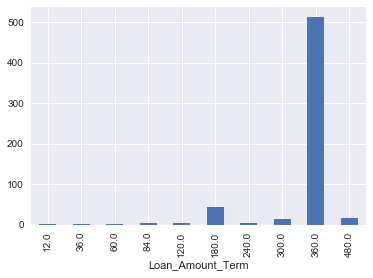

In [64]:
Loan_train.Loan_Status.groupby(Loan_train["Loan_Amount_Term"]).count().plot(kind="bar")

In [65]:
Loan_train.loc[Loan_train["Loan_Amount_Term"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Basket,Income_Basket(Coapplicant),Loan_Basket
19,LP001041,Male,Yes,0,Graduate,No,0,0.0,0.0,NaN,1,Urban,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
36,LP001109,Male,Yes,0,Graduate,No,0,0.0,0.0,NaN,0,Urban,N,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
44,LP001136,Male,Yes,0,Not Graduate,Yes,0,0.0,0.0,NaN,1,Urban,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
45,LP001137,Female,No,0,Graduate,No,0,0.0,0.0,NaN,1,Urban,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
73,LP001250,Male,Yes,3,Not Graduate,No,0,0.0,0.0,NaN,0,Semiurban,N,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
112,LP001391,Male,Yes,0,Not Graduate,No,0,0.0,1.0,NaN,0,Rural,N,"(69.15, 11700.0]","(-41.667, 13889.0]","(147.2, 285.4]"
165,LP001574,Male,Yes,0,Graduate,No,0,0.0,1.0,NaN,1,Rural,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(147.2, 285.4]"
197,LP001669,Female,No,0,Not Graduate,No,0,0.0,0.0,NaN,1,Urban,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
223,LP001749,Male,Yes,0,Graduate,No,0,0.0,1.0,NaN,1,Semiurban,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(147.2, 285.4]"
232,LP001770,Male,No,0,Not Graduate,No,0,0.0,0.0,NaN,1,Rural,Y,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"


In [66]:
Loan_train["Loan_Amount_Term"] = Loan_train["Loan_Amount_Term"].fillna(360)

In [67]:
Loan_train["Loan_Amount_Term"] = Loan_train["Loan_Amount_Term"].astype(int)

In [68]:
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 480] = 0
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 360] = 1
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 300] = 2
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 240] = 3
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 180] = 4
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 120] = 5
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 84] = 6
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 60] = 7
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 36] = 8
Loan_train["Loan_Amount_Term"][Loan_train["Loan_Amount_Term"] == 12] = 9

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

In [69]:
Loan_train.Loan_Amount_Term.unique()

array([1, 5, 3, 4, 7, 2, 0, 8, 6, 9], dtype=int64)

In [70]:
Loan_train.Loan_Amount_Term.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Amount_Term, dtype: int32

In [71]:
Loan_train.loc[Loan_train["Property_Area"] == "Urban", "Property_Area"] = 1
Loan_train.loc[Loan_train["Property_Area"] == "Rural", "Property_Area"] = 2
Loan_train.loc[Loan_train["Property_Area"] == "Semiurban", "Property_Area"] = 3

Loan_train.loc[Loan_train["Loan_Status"] == "Y", "Loan_Status"] = 1
Loan_train.loc[Loan_train["Loan_Status"] == "N", "Loan_Status"] = 0

Loan_train.loc[Loan_train["Self_Employed"] == "Yes", "Self_Employed"] = 1
Loan_train.loc[Loan_train["Self_Employed"] == "No", "Self_Employed"] = 0

Loan_train.loc[Loan_train["Education"] == "Graduate", "Education"] = 1
Loan_train.loc[Loan_train["Education"] == "Not Graduate", "Education"] = 0

Loan_train.loc[Loan_train["Married"] == "Yes", "Married"] = 1
Loan_train.loc[Loan_train["Married"] == "No", "Married"] = 0

Loan_train.replace({"Gender" : {"Male" : 1, "Female": 0}}, inplace = True)

In [72]:
Loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Basket,Income_Basket(Coapplicant),Loan_Basket
0,LP001002,1,0,0,1,0,0,0.0,1.0,1,1,1,1,"(69.15, 11700.0]","(-41.667, 13889.0]","(147.2, 285.4]"
1,LP001003,1,1,1,1,0,0,0.0,0.0,1,1,2,0,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
2,LP001005,1,1,0,1,1,0,0.0,0.0,1,1,1,1,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
3,LP001006,1,1,0,0,0,0,0.0,0.0,1,1,1,1,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"
4,LP001008,1,0,0,1,0,0,0.0,0.0,1,1,1,1,"(69.15, 11700.0]","(-41.667, 13889.0]","(8.309, 147.2]"


In [73]:
Loan_train["CoapplicantIncome"] = Loan_train["CoapplicantIncome"].astype(int)
Loan_train["LoanAmount"] = Loan_train["LoanAmount"].astype(int)
Loan_train["Credit_History"] = Loan_train["Credit_History"].astype(int)
Loan_train["Loan_Status"] = Loan_train["Loan_Status"].astype(int)

In [74]:
predictors = ["Gender", "Married","Dependents","Education","Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]

In [75]:
# Accuracy on Training data provided

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, min_samples_leaf=1)

kf = cross_validation.KFold(Loan_train.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, Loan_train[predictors], Loan_train["Loan_Status"], cv=kf)
print("Accuracy:- {}".format(scores.mean()))

Accuracy:- 0.7703411445879165


In [76]:
# Changing some parameters 

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

kf = cross_validation.KFold(Loan_train.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, Loan_train[predictors], Loan_train["Loan_Status"], cv=kf)
print("Accuracy:- {}".format(scores.mean()))

Accuracy:- 0.7980392156862745


# Processing on test file

In [77]:
# Reading the train file in to the memory as Pandas Dataframe
Loan_test = pd.read_csv("./data/Loan Data/test.csv")
Loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [78]:
Loan_test.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP002183,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [79]:
Loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [80]:
# Now we handle the missing values in othe categorical fetures.
Loan_test.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [81]:
# Total Male applicant count in the Dataset
male_count = Loan_test.Gender.loc[Loan_test.Gender == 'Male'].count()
print("Male Count:- {}".format(male_count))

#Total Female applicant count in the Dataset
female_count = Loan_test.Gender.loc[Loan_test["Gender"] == 'Female'].count()
print("Female Count:- {}".format(female_count))

# Mean value of Male income count
m_income_mean = Loan_test.ApplicantIncome.loc[Loan_test["Gender"] == 'Male'].mean()
print("Male Avg. Income:- {}".format(int(m_income_mean)))

# Mean value of Female count
f_income_mean = Loan_test.ApplicantIncome.loc[Loan_test["Gender"] == 'Female'].mean()
print("Female Avg. Income:- {}".format(int(f_income_mean)))

Male Count:- 286
Female Count:- 70
Male Avg. Income:- 4932
Female Avg. Income:- 4163


In [82]:
Loan_test["Gender"][(Loan_test.Gender.isnull()) & (Loan_test.ApplicantIncome >= m_income_mean)] = "Male"
Loan_test["Gender"][(Loan_test.Gender.isnull()) & (Loan_test.ApplicantIncome < m_income_mean)] = "Female"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
Loan_test["Married"][(Loan_test["Married"].isnull()) & (Loan_test.ApplicantIncome >= m_income_mean)] = "No"
Loan_test["Married"][(Loan_test["Married"].isnull()) & (Loan_test.ApplicantIncome < m_income_mean)] = "Yes"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
Loan_test.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [85]:
Loan_test["Self_Employed"][(Loan_test["Self_Employed"].isnull()) & (Loan_test.Education == "Graduate")] = "No"
Loan_test["Self_Employed"][(Loan_test["Self_Employed"].isnull()) & (Loan_test.Education == "Not Graduate")] = "Yes"

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
Loan_test.Credit_History.unique()

array([  1.,  nan,   0.])

In [87]:
Loan_test["ApplicantIncome"][Loan_test["ApplicantIncome"] <= 11700] = 0
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 11700) & (Loan_test["ApplicantIncome"] <= 23250)] = 1
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 23250) & (Loan_test["ApplicantIncome"] <= 34800)] = 2
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 34800) & (Loan_test["ApplicantIncome"] <= 46350)] = 3
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 46350) & (Loan_test["ApplicantIncome"] <= 57900)] = 4
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 57900) & (Loan_test["ApplicantIncome"] <= 69450)] = 5
Loan_test["ApplicantIncome"][(Loan_test["ApplicantIncome"] > 69450) & (Loan_test["ApplicantIncome"] <= 81000)] = 6

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

In [88]:
Loan_test["CoapplicantIncome"][Loan_test["CoapplicantIncome"] <= 13889] = 0
Loan_test["CoapplicantIncome"][(Loan_test["CoapplicantIncome"] > 13889) & (Loan_test["CoapplicantIncome"] <= 27778)] = 1
Loan_test["CoapplicantIncome"][(Loan_test["CoapplicantIncome"] > 27778) & (Loan_test["CoapplicantIncome"] <= 41667)] = 2

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
Loan_test[["LoanAmount", "Gender"]].groupby(Loan_test["Gender"]).mean()

,LoanAmount
Gender,
Female,125.384615
Male,139.084507


In [90]:
Loan_test["LoanAmount"][(Loan_test["LoanAmount"].isnull()) & (Loan_test["Gender"] == "Female")] = 125
Loan_test["LoanAmount"][(Loan_test["LoanAmount"].isnull()) & (Loan_test["Gender"] == "Male")] = 139

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
Loan_test.Loan_Amount_Term.unique()

array([ 360.,  240.,  180.,   nan,   60.,  480.,   84.,   12.,  300.,
        350.,   36.,  120.,    6.])

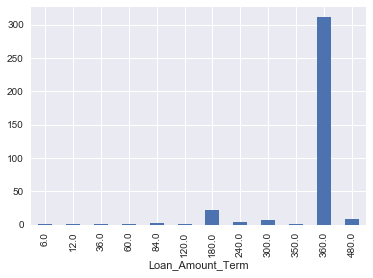

In [92]:
Loan_test.Loan_Amount_Term.groupby(Loan_test["Loan_Amount_Term"]).count().plot(kind='bar')

In [93]:
Loan_test["Loan_Amount_Term"] = Loan_test["Loan_Amount_Term"].fillna(360)
Loan_test["Loan_Amount_Term"] = Loan_test["Loan_Amount_Term"].astype(int)

In [94]:
Loan_test.replace({"Gender" : {"Male" : 1, "Female": 0}}, inplace = True)

Loan_test.loc[Loan_test["Married"] == "Yes", "Married"] = 1
Loan_test.loc[Loan_test["Married"] == "No", "Married"] = 0

Loan_test.loc[Loan_test["Education"] == "Graduate", "Education"] = 1
Loan_test.loc[Loan_test["Education"] == "Not Graduate", "Education"] = 0

Loan_test.loc[Loan_test["Self_Employed"] == "Yes", "Self_Employed"] = 1
Loan_test.loc[Loan_test["Self_Employed"] == "No", "Self_Employed"] = 0

Loan_test.loc[Loan_test["Property_Area"] == "Urban", "Property_Area"] = 1
Loan_test.loc[Loan_test["Property_Area"] == "Rural", "Property_Area"] = 2
Loan_test.loc[Loan_test["Property_Area"] == "Semiurban", "Property_Area"] = 3

In [95]:
Loan_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,0,0,110.0,360,1.0,1
1,LP001022,1,1,1,1,0,0,0,126.0,360,1.0,1
2,LP001031,1,1,2,1,0,0,0,208.0,360,1.0,1
3,LP001035,1,1,2,1,0,0,0,100.0,360,NaN,1
4,LP001051,1,0,0,0,0,0,0,78.0,360,1.0,1


In [96]:
Loan_test["LoanAmount"][Loan_test["LoanAmount"] <= 147] = 0
Loan_test["LoanAmount"][(Loan_test["LoanAmount"] > 147) & (Loan_test["LoanAmount"] <= 285)] = 1
Loan_test["LoanAmount"][(Loan_test["LoanAmount"] > 285) & (Loan_test["LoanAmount"] <= 424)] = 2
Loan_test["LoanAmount"][(Loan_test["LoanAmount"] > 424) & (Loan_test["LoanAmount"] <= 561)] = 3
Loan_test["LoanAmount"][(Loan_test["LoanAmount"] > 561) & (Loan_test["LoanAmount"] <= 700)] = 4

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

In [97]:
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 480] = 0
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 360] = 1
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 300] = 2
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 240] = 3
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 180] = 4
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 120] = 5
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 84] = 6
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 60] = 7
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 36] = 8
Loan_test["Loan_Amount_Term"][Loan_test["Loan_Amount_Term"] == 12] = 9

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Mini

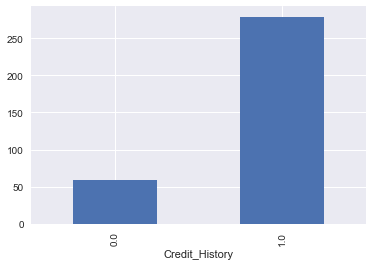

In [98]:
Loan_test.Credit_History.groupby(Loan_test["Credit_History"]).count().plot(kind="bar")

In [99]:
Loan_test.Credit_History = Loan_test.Credit_History.fillna(1)

In [100]:
Loan_test.Credit_History = Loan_test.Credit_History.astype(int)

In [101]:
Loan_train.Gender.unique()

array([1, 0], dtype=int64)

In [102]:
#Loan_train.replace({"Dependents" : {"3+" : "3"}}, inplace = True)
Loan_test.Dependents.fillna("0",inplace=True)
Loan_test["Dependents"][Loan_test["Dependents"] == "3+"] = "3"
Loan_test.Dependents = Loan_test.Dependents.astype(int)

C:\Miniconda3\envs\py36_work\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,0,0,0.0,1,1,1
1,LP001022,1,1,1,1,0,0,0,0.0,1,1,1
2,LP001031,1,1,2,1,0,0,0,1.0,1,1,1
3,LP001035,1,1,2,1,0,0,0,0.0,1,1,1
4,LP001051,1,0,0,0,0,0,0,0.0,1,1,1


In [104]:
Loan_test.LoanAmount = Loan_test.LoanAmount.astype(int)

In [105]:
predictors = ["Gender", "Married","Education","Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]

In [106]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, min_samples_leaf=1)

In [107]:
alg.fit(Loan_train[predictors],Loan_train["Loan_Status"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
prediction = alg.predict(Loan_test[predictors])

In [109]:
submission = pd.DataFrame({
        "Loan_ID": Loan_test["Loan_ID"],
        "Loan_Status": prediction
    })
print(submission)
submission.to_csv("./data/Loan Data/prediction.csv", index=False)

      Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            0
5    LP001054            1
6    LP001055            1
7    LP001056            0
8    LP001059            1
9    LP001067            1
10   LP001078            0
11   LP001082            1
12   LP001083            1
13   LP001094            0
14   LP001096            1
15   LP001099            1
16   LP001105            1
17   LP001107            1
18   LP001108            1
19   LP001115            1
20   LP001121            1
21   LP001124            1
22   LP001128            1
23   LP001135            1
24   LP001149            1
25   LP001153            0
26   LP001163            1
27   LP001169            1
28   LP001174            1
29   LP001176            1
..        ...          ...
337  LP002856            1
338  LP002857            1
339  LP002858            0
340  LP002860            1
341  LP002867            1
3